In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prettytable import PrettyTable
from sklearn import metrics
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures


accuracies = {}

def perform_prediction(model, x_train, y_train, x_test, y_test, method, print_coefficients=False):
    model.fit(x_train, y_train)
    if print_coefficients:
        print("Coefficients: \n", model.coef_)
        _ = [print(k, v) for k, v in zip(x_train.columns, model.coef_[0])]
        print("Intercept: \n", model.intercept_)

    y_pred = model.predict(x_test)

    score = metrics.accuracy_score(y_test, y_pred)
    print(f"Score: {score}")

    ax = plt.axes()
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
    ax.set_title(method)
    plt.show()

    global accuracies
    accuracies[method] = score


In [16]:
data = pd.read_csv("data/diabetes.csv")

In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)
y.shape, X.shape

((768,), (768, 8))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True) 

Coefficients: 
 [[ 1.16614371e-01  3.07264231e-02 -1.09139229e-02  7.02748673e-04
  -1.45313251e-03  1.01342912e-01  1.16398299e+00  2.68737756e-02]]
Pregnancies 0.11661437061492863
Glucose 0.030726423131251658
BloodPressure -0.010913922939848306
SkinThickness 0.0007027486734661871
Insulin -0.0014531325126949633
BMI 0.10134291175223537
DiabetesPedigreeFunction 1.1639829900960479
Age 0.02687377563151882
Intercept: 
 [-8.84217045]
Score: 0.7864583333333334


c:\workspace\Machine-Learning-BMSTU\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


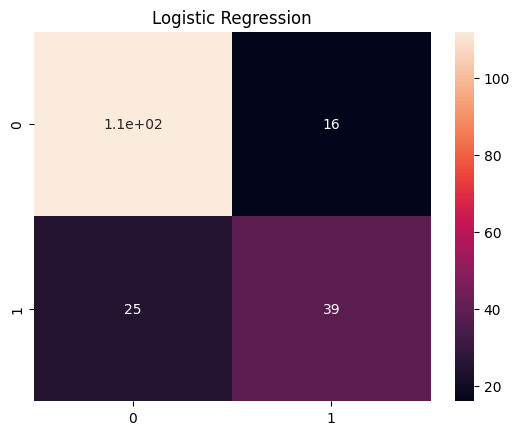

In [22]:
perform_prediction(LogisticRegression(), x_train, y_train, x_test, y_test, "Logistic Regression", print_coefficients=True)

c:\workspace\Machine-Learning-BMSTU\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: 0.6927083333333334


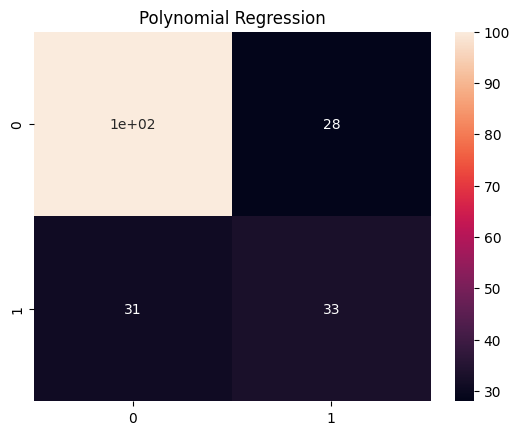

In [23]:
poly = PolynomialFeatures(2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

perform_prediction(LogisticRegression(), x_poly_train, y_train, x_poly_test, y_test, "Polynomial Regression")

Score: 0.7760416666666666


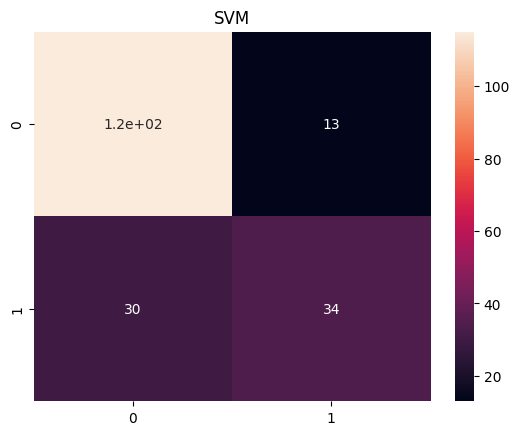

In [24]:
perform_prediction(svm.SVC(), x_train, y_train, x_test, y_test, "SVM")

Score: 0.671875


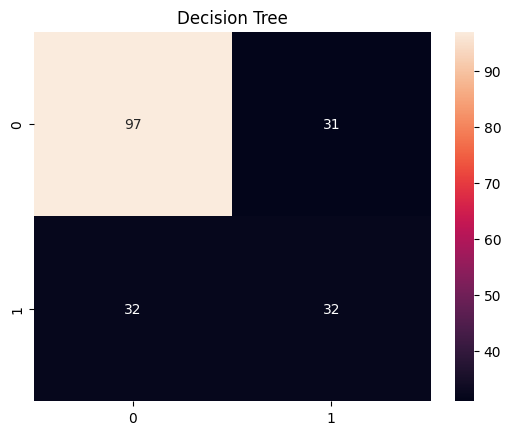

In [25]:
perform_prediction(DecisionTreeClassifier(), x_train, y_train, x_test, y_test, "Decision Tree")

Score: 0.7291666666666666


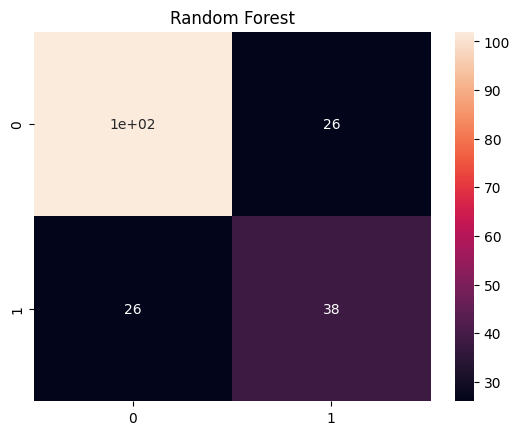

In [26]:
perform_prediction(RandomForestClassifier(), x_train, y_train, x_test, y_test, "Random Forest")

Score: 0.71875


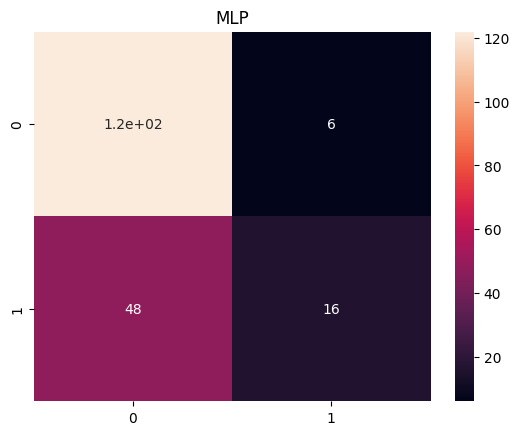

In [27]:
perform_prediction(MLPClassifier(), x_train, y_train, x_test, y_test, "MLP")

In [29]:
table = PrettyTable()
table.field_names = ["Метод", "Оценка точности"]
for method in accuracies.keys():
    table.add_row([method, round(accuracies[method],5)])
print(table)

+-----------------------+-----------------+
|         Метод         | Оценка точности |
+-----------------------+-----------------+
|  Logistic Regression  |     0.78646     |
| Polynomial Regression |     0.69271     |
|          SVM          |     0.77604     |
|     Decision Tree     |     0.67188     |
|     Random Forest     |     0.72917     |
|          MLP          |     0.71875     |
+-----------------------+-----------------+
